# Utilização de algoritmos de inteligência artificial na previsão de resultados de partidas de futebol

Estudo e comparação do desempenho de diferentes algoritmos de inteligência artificial

TCC do curso de Ciência da Computação do Instituto Federal do Triângulo Mineiro - Campus Ituiutaba

Autor: Olesio Gardenghi Neto

## Pré-processamento dos dados

In [145]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Silenciando os warnings
warnings.filterwarnings("ignore")
# Mudando o estilo de plot dos gráficos
plt.style.use('seaborn')
# Comando para mostrar os gráficos dentro do Jupyter
%matplotlib inline

In [146]:
# Lendo a base de dados e transformando em dataframe
df = pd.read_csv("data/Brasileirao2012.csv")

In [147]:
df.head()

,athlete_id,athlete_name,round,team_id,team_name,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,...,sucessfulPassesPercent,timePlayed,switchField,backPasses,nickname,substitute,substituted,win,draw,defeat
0,0.0,NaN,1,5.0,Botafogo,3.0,253.0,5.0,23.0,0.0,...,83.7,990.0,1.0,4.0,NaN,0.0,0.0,1,0,0
1,0.0,NaN,1,24.0,São Paulo,5.0,193.0,2.0,34.0,2.0,...,79.1,990.0,1.0,4.0,NaN,0.0,0.0,0,0,1
2,0.0,NaN,1,25.0,Vasco,2.0,205.0,1.0,33.0,1.0,...,82.1,990.0,5.0,6.0,NaN,0.0,0.0,1,0,0
3,0.0,NaN,1,13.0,Grêmio,6.0,291.0,4.0,32.0,2.0,...,81.2,990.0,3.0,8.0,NaN,0.0,0.0,0,0,1
4,0.0,NaN,1,17.0,Palmeiras,0.0,296.0,2.0,45.0,1.0,...,84.2,990.0,1.0,2.0,NaN,0.0,0.0,0,1,0


In [148]:
df.columns

Index(['athlete_id', 'athlete_name', 'round', 'team_id', 'team_name',
       'assistances', 'receivedBalls', 'recoveredBalls', 'lostBalls',
       'yellowCards', 'redCards', 'cards', 'crossBalls', 'receivedCrossBalls',
       'missedCrossBalls', 'receivedCrossBallsPercent', 'defenses',
       'sucessfulTackles', 'unsucessfulTackles', 'tackles', 'sucessfulDribles',
       'unsucessfulDribles', 'dribles', 'givenCorners', 'receivedCorners',
       'receivedFouls', 'committedFouls', 'goodFinishes', 'postFinishes',
       'badFinishes', 'finishes', 'goals', 'ownGoals', 'offsides',
       'longPasses', 'sucessfulLongPasses', 'unsucessfulLongPasses',
       'sucessfulPasses', 'unsucessfulPasses', 'passes',
       'sucessfulPassesPercent', 'timePlayed', 'switchField', 'backPasses',
       'nickname', 'substitute', 'substituted', 'win', 'draw', 'defeat'],
      dtype='object')

In [149]:
df.describe()

,athlete_id,athlete_name,round,team_id,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,...,sucessfulPassesPercent,timePlayed,switchField,backPasses,nickname,substitute,substituted,win,draw,defeat
count,756.0,0.0,760.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,0.0,756.0,756.0,760.000000,760.000000,760.000000
mean,0.0,NaN,19.500000,76.781746,3.369048,226.791005,3.056878,32.878307,2.337302,0.145503,...,80.196296,984.927279,2.146825,3.279101,NaN,0.0,0.0,0.359211,0.281579,0.359211
std,0.0,NaN,10.973078,235.210186,2.196335,63.948520,1.902440,8.524744,1.391073,0.367549,...,5.581413,38.360813,1.997582,2.373728,NaN,0.0,0.0,0.480085,0.450065,0.480085
min,0.0,NaN,1.000000,1.000000,0.000000,88.000000,0.000000,6.000000,0.000000,0.000000,...,56.700000,1.023000,0.000000,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,NaN,10.000000,8.500000,2.000000,179.000000,2.000000,27.000000,1.000000,0.000000,...,76.800000,990.000000,1.000000,1.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
50%,0.0,NaN,19.500000,17.000000,3.000000,219.000000,3.000000,33.000000,2.000000,0.000000,...,80.800000,990.000000,2.000000,3.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
75%,0.0,NaN,29.000000,30.000000,5.000000,271.250000,4.000000,38.000000,3.000000,0.000000,...,84.200000,990.000000,3.000000,5.000000,NaN,0.0,0.0,1.000000,1.000000,1.000000
max,0.0,NaN,38.000000,1094.000000,13.000000,473.000000,11.000000,63.000000,8.000000,2.000000,...,93.200000,996.000000,11.000000,14.000000,NaN,0.0,0.0,1.000000,1.000000,1.000000


In [150]:
# Selecionando apenas as características que nos interessa
df = df[['assistances', 'receivedBalls', 'recoveredBalls', 'lostBalls', 'yellowCards', 'redCards', 'receivedCrossBalls', 'missedCrossBalls', 'defenses', 'sucessfulTackles','unsucessfulTackles','sucessfulDribles',
       'unsucessfulDribles', 'givenCorners', 'receivedCorners',
       'receivedFouls', 'committedFouls', 'goodFinishes','badFinishes', 'ownGoals', 'offsides','sucessfulLongPasses', 'unsucessfulLongPasses',
       'sucessfulPasses', 'unsucessfulPasses', 'win', 'draw', 'defeat']]

In [151]:
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,sucessfulTackles,...,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,win,draw,defeat
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,3.0,69.0,...,10.0,0.0,1.0,0.0,0.0,242.0,47.0,1,0,0
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,4.0,83.0,...,11.0,0.0,2.0,0.0,1.0,185.0,49.0,0,0,1
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,3.0,85.0,...,9.0,0.0,1.0,1.0,0.0,197.0,43.0,1,0,0
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,2.0,90.0,...,11.0,0.0,5.0,0.0,1.0,281.0,65.0,0,0,1
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,5.0,81.0,...,10.0,0.0,0.0,0.0,2.0,287.0,54.0,0,1,0


In [152]:
# Junção das 3 colunas de resultados em uma só
def convert_output(source):
    target = source.copy() #make a copy from source
    target['new'] = 2 #create a new column and initialize it with a random value
    for i, rows in target.iterrows():
        if rows['win'] == 1:
            rows['new'] = 2
        if rows['draw'] == 1:
            rows['new'] = 1
        if rows['defeat'] == 1:
            rows['new'] = 0
    return target.iloc[:, -1]  # return all rows, and only the last column

df['FTR'] = convert_output(df[['win','draw','defeat']])

In [153]:
df.drop(['win','draw','defeat'],axis=1, inplace=True)

In [154]:
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,sucessfulTackles,...,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,FTR
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,3.0,69.0,...,12.0,8.0,10.0,0.0,1.0,0.0,0.0,242.0,47.0,2
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,4.0,83.0,...,21.0,5.0,11.0,0.0,2.0,0.0,1.0,185.0,49.0,0
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,3.0,85.0,...,11.0,4.0,9.0,0.0,1.0,1.0,0.0,197.0,43.0,2
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,2.0,90.0,...,15.0,4.0,11.0,0.0,5.0,0.0,1.0,281.0,65.0,0
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,5.0,81.0,...,21.0,11.0,10.0,0.0,0.0,0.0,2.0,287.0,54.0,1


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 26 columns):
assistances              756 non-null float64
receivedBalls            756 non-null float64
recoveredBalls           756 non-null float64
lostBalls                756 non-null float64
yellowCards              756 non-null float64
redCards                 756 non-null float64
receivedCrossBalls       756 non-null float64
missedCrossBalls         756 non-null float64
defenses                 756 non-null float64
sucessfulTackles         756 non-null float64
unsucessfulTackles       756 non-null float64
sucessfulDribles         756 non-null float64
unsucessfulDribles       756 non-null float64
givenCorners             756 non-null float64
receivedCorners          756 non-null float64
receivedFouls            756 non-null float64
committedFouls           756 non-null float64
goodFinishes             756 non-null float64
badFinishes              756 non-null float64
ownGoals             

In [156]:
df.isnull().sum()

assistances              4
receivedBalls            4
recoveredBalls           4
lostBalls                4
yellowCards              4
redCards                 4
receivedCrossBalls       4
missedCrossBalls         4
defenses                 4
sucessfulTackles         4
unsucessfulTackles       4
sucessfulDribles         4
unsucessfulDribles       4
givenCorners             4
receivedCorners          4
receivedFouls            4
committedFouls           4
goodFinishes             4
badFinishes              4
ownGoals                 4
offsides                 4
sucessfulLongPasses      4
unsucessfulLongPasses    4
sucessfulPasses          4
unsucessfulPasses        4
FTR                      0
dtype: int64

In [157]:
df.dropna(inplace=True)
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,sucessfulTackles,...,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,FTR
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,3.0,69.0,...,12.0,8.0,10.0,0.0,1.0,0.0,0.0,242.0,47.0,2
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,4.0,83.0,...,21.0,5.0,11.0,0.0,2.0,0.0,1.0,185.0,49.0,0
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,3.0,85.0,...,11.0,4.0,9.0,0.0,1.0,1.0,0.0,197.0,43.0,2
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,2.0,90.0,...,15.0,4.0,11.0,0.0,5.0,0.0,1.0,281.0,65.0,0
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,5.0,81.0,...,21.0,11.0,10.0,0.0,0.0,0.0,2.0,287.0,54.0,1


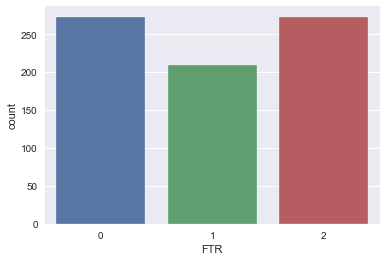

In [158]:
# 0 - Derrota, 1 - Empate, 2 - Vitória
sns.countplot(x='FTR', data=df)

In [159]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[:-1])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.dropna(inplace=True)
df.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,...,receivedFouls,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
0,2.0,-0.168140,0.410117,1.022060,-1.159548,-1.681327,-0.396135,0.727197,1.028067,-0.139832,...,0.535935,-1.251674,1.460464,0.751466,0.0,-0.718523,-0.888714,-0.920240,0.380777,-0.387335
1,0.0,0.743071,-0.528759,-0.555906,0.131668,-0.242636,-0.396135,0.064435,-1.829355,0.368405,...,-1.251566,0.535231,0.180088,1.042655,0.0,-0.177484,-0.888714,-0.304030,-0.541305,-0.194178
2,2.0,-0.623745,-0.340984,-1.081895,0.014285,-0.961982,-0.396135,-0.598326,0.576895,-0.139832,...,-0.655732,-1.450219,-0.246704,0.460278,0.0,-0.718523,-0.132957,-0.920240,-0.347182,-0.773648
3,0.0,1.198676,1.004738,0.496071,-0.103099,-0.242636,-0.396135,0.064435,0.125723,-0.648070,...,-1.450177,-0.656039,-0.246704,1.042655,0.0,1.445633,-0.888714,-0.304030,1.011675,1.351073
4,1.0,-1.534956,1.082978,-0.555906,1.422884,-0.961982,-0.396135,0.727197,-0.927011,0.876642,...,0.138713,0.535231,2.740839,0.751466,0.0,-1.259561,-0.888714,0.312181,1.108736,0.288713


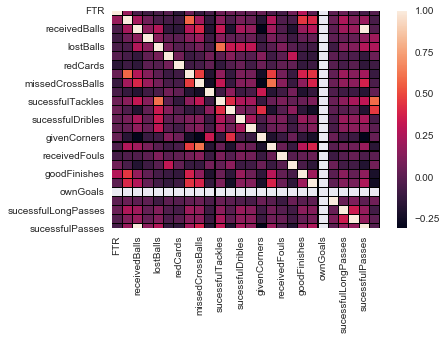

In [160]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

## Aplicando os algoritmos de IA

In [161]:
# Características
X = df.drop('FTR',axis=1)
# Alvo da previsão
y = df['FTR']

In [162]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [163]:
df_y_test = y_test.reset_index()
df_y_test.drop('index',axis=1, inplace=True)

### Regressão Logística

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_all = logistic_regression.score(X_test, y_test) * 100
cross_log_all = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

In [166]:
print(classification_report(y_test,predict_logistic_regression))
print(confusion_matrix(y_test,predict_logistic_regression))
print('\nScore Regressão Logística: %.2f' %reg_log_all + "%")
print('\nScore Regressão Logística Cross Validation: %.2f' %cross_log_all + "%")

              precision    recall  f1-score   support

         0.0       0.47      0.67      0.55        82
         1.0       0.29      0.10      0.14        62
         2.0       0.47      0.50      0.48        82

    accuracy                           0.45       226
   macro avg       0.41      0.42      0.39       226
weighted avg       0.42      0.45      0.42       226

[[55  4 23]
 [32  6 24]
 [30 11 41]]

Score Regressão Logística: 45.13%

Score Regressão Logística Cross Validation: 58.67%


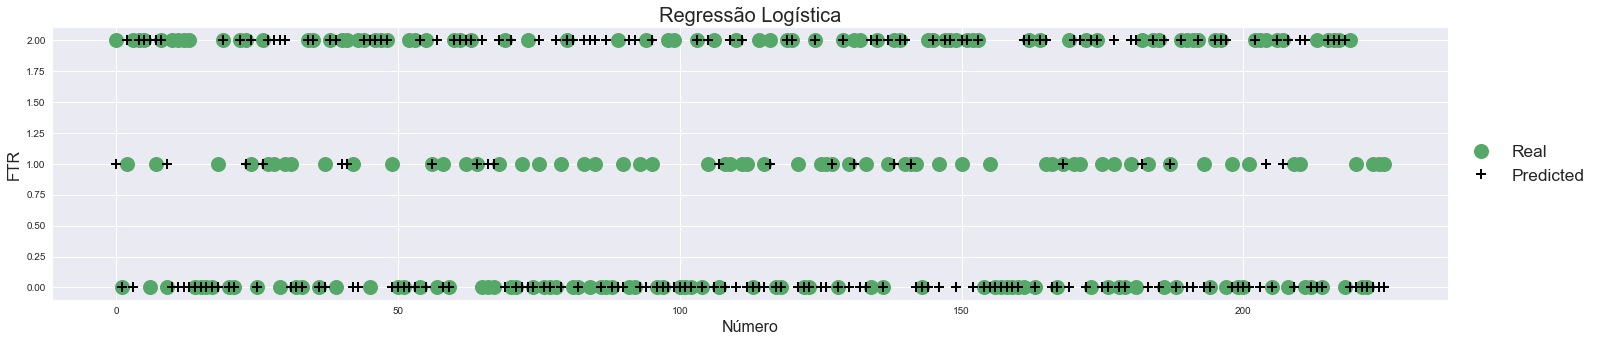

In [167]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_logistic_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Logística',fontsize=20)
plt.show()

### Árvore de Decisão

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_all = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_all = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

In [170]:
print(classification_report(y_test,predict_decision_tree))
print(confusion_matrix(y_test,predict_decision_tree))
print('\nScore Árvore de Decisão: %.2f' %dec_tree_all + "%")
print('\nScore Árvore de Decisão Cross Validation: %.2f' %cross_dec_tree_all + "%")

              precision    recall  f1-score   support

         0.0       0.28      0.27      0.28        82
         1.0       0.14      0.18      0.16        62
         2.0       0.44      0.38      0.41        82

    accuracy                           0.28       226
   macro avg       0.29      0.27      0.28       226
weighted avg       0.30      0.28      0.29       226

[[22 44 16]
 [27 11 24]
 [29 22 31]]

Score Árvore de Decisão: 28.32%

Score Árvore de Decisão Cross Validation: 57.33%


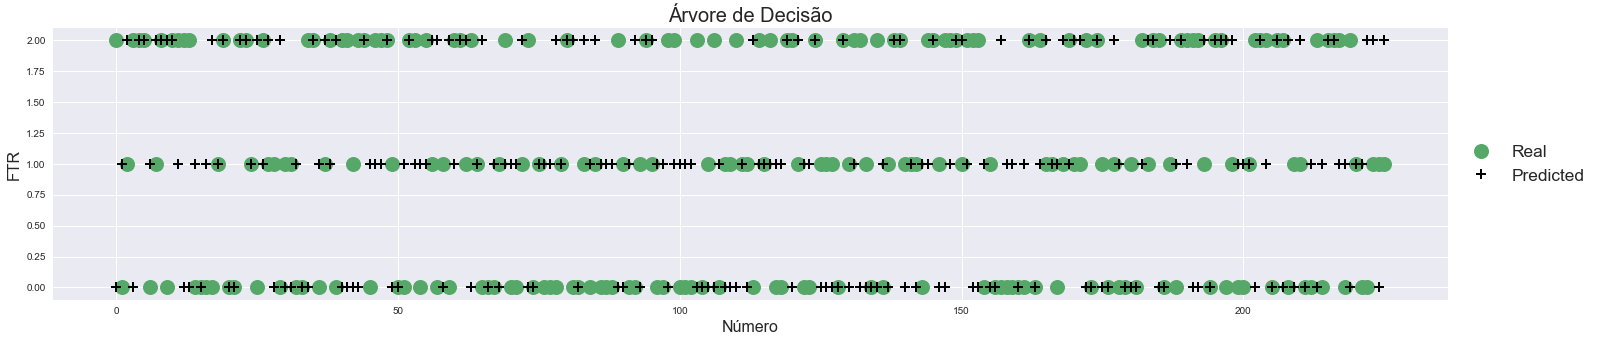

In [171]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_decision_tree, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Árvore de Decisão',fontsize=20)
plt.show()

### Floresta Aleatória

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Número estimativas')

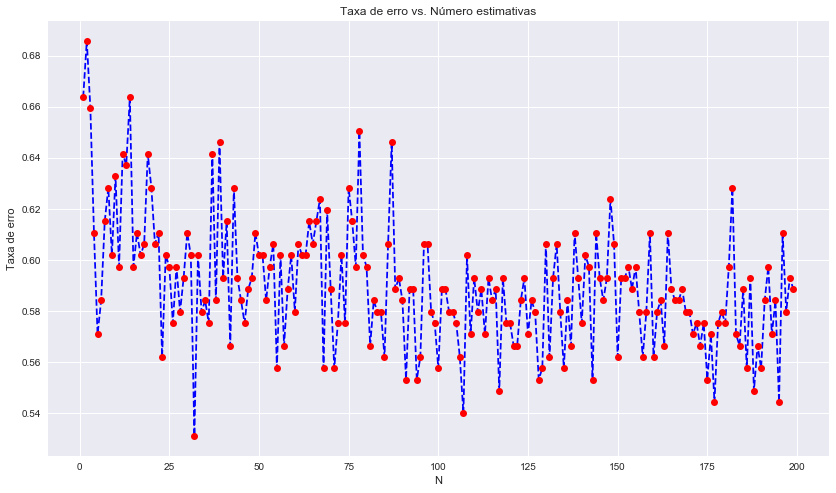

In [174]:
plt.figure(figsize=(14,8))
plt.plot(range(1,200),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Número estimativas")

In [175]:
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_all = random_forest.score(X_test, y_test) * 100
cross_rand_for_all = max(cross_val_score(random_forest, X, y, cv=10)) * 100

In [176]:
print(classification_report(y_test,predict_random_forest))
print(confusion_matrix(y_test,predict_random_forest))
print('\nScore Floresta Aleatória: %.2f' %rand_for_all + "%")
print("\nScore Floresta Aleatória: %.2f" %cross_rand_for_all + "%")

              precision    recall  f1-score   support

         0.0       0.40      0.56      0.47        82
         1.0       0.22      0.15      0.17        62
         2.0       0.37      0.32      0.34        82

    accuracy                           0.36       226
   macro avg       0.33      0.34      0.33       226
weighted avg       0.34      0.36      0.34       226

[[46 13 23]
 [32  9 21]
 [37 19 26]]

Score Floresta Aleatória: 35.84%

Score Floresta Aleatória: 53.33%


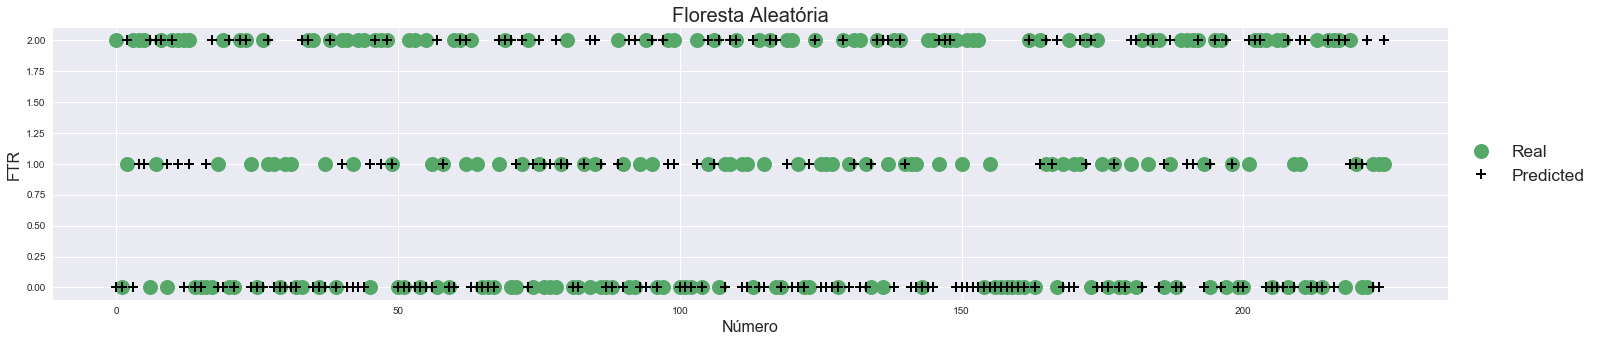

In [177]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_random_forest, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Floresta Aleatória',fontsize=20)
plt.show()

### K Nearest Neighbours (KNN)

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Número estimativas')

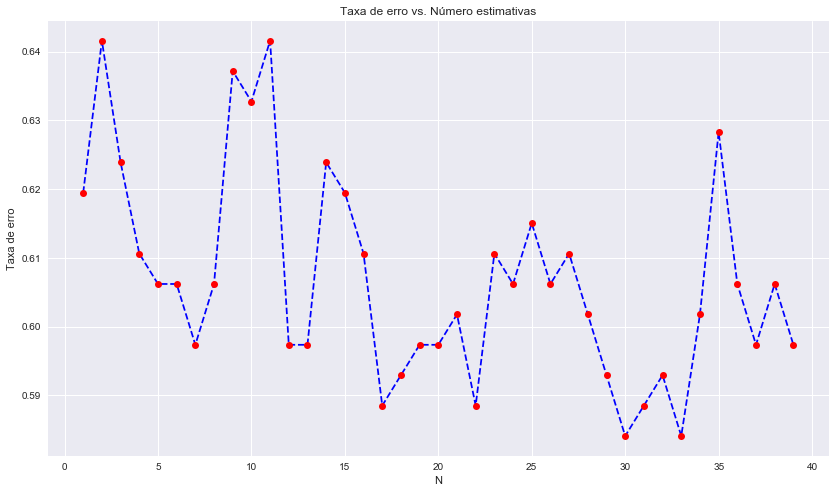

In [180]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Número estimativas")

In [181]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_all = knn.score(X_test, y_test) * 100
cross_knn_all = max(cross_val_score(knn, X, y, cv=10)) * 100

In [182]:
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('\nScore KNN: %.2f' %knn_all + "%")
print("\nScore KNN Cross Validation: %.2f" %cross_knn_all + "%")

              precision    recall  f1-score   support

         0.0       0.45      0.54      0.49        82
         1.0       0.29      0.23      0.25        62
         2.0       0.42      0.41      0.42        82

    accuracy                           0.41       226
   macro avg       0.39      0.39      0.39       226
weighted avg       0.40      0.41      0.40       226

[[44 12 26]
 [27 14 21]
 [26 22 34]]

Score KNN: 40.71%

Score KNN Cross Validation: 49.33%


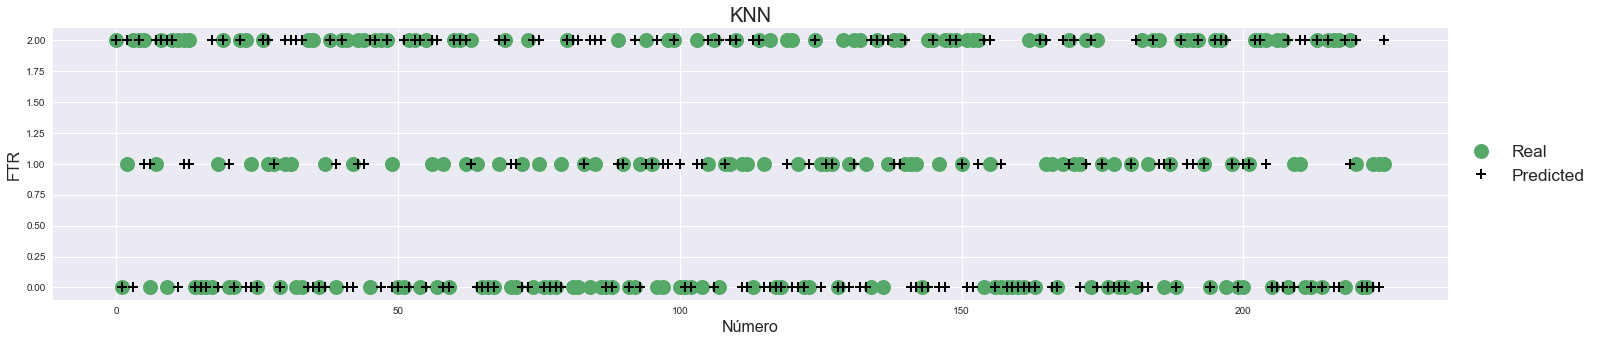

In [183]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_knn, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

### Support-vector Machine (SVM)

In [184]:
from sklearn.svm import SVC

In [185]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid.fit(X, y)
predict_svm = grid.predict(X_test)
svm_all = grid.score(X_test, y_test) * 100

In [186]:
print(confusion_matrix(y_test,predict_svm))
print('\nScore SVM: %.2f' %svm_all + "%")

[[63  0 19]
 [42  0 20]
 [29  0 53]]

Score SVM: 51.33%


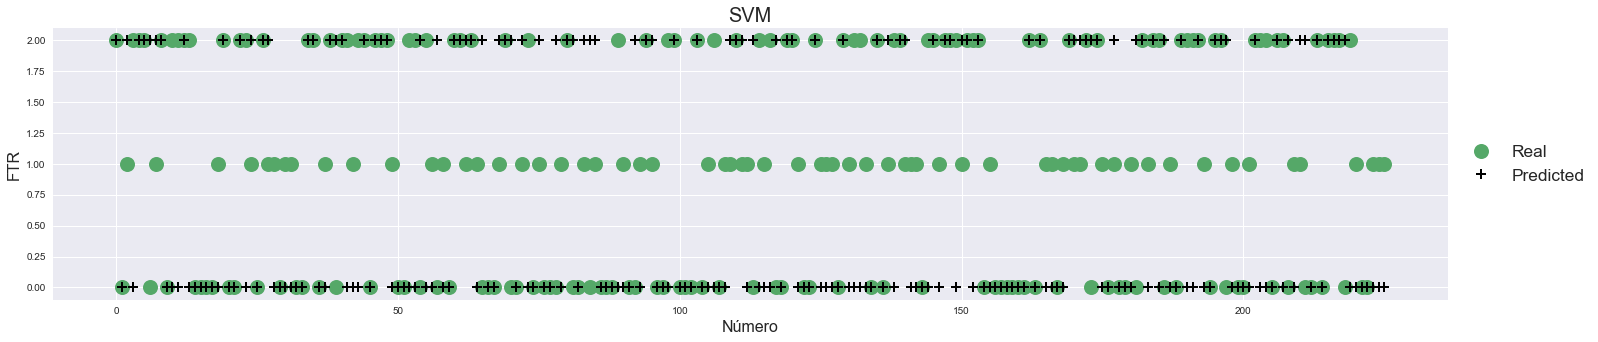

In [187]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_svm, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('SVM',fontsize=20)
plt.show()

### Multi-layer Perceptron Classifier

In [188]:
from sklearn.neural_network import MLPClassifier

In [189]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_all = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_all = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [190]:
#print(classification_report(y_test,predict_mlp))
print(confusion_matrix(y_test,predict_mlp_classifier))
print('\nScore MLP: %.2f' %mlp_all + "%")
print("\nScore MLP Cross Validation: %.2f" %cross_mlp_all + "%")

[[61  0 21]
 [37  0 25]
 [34  0 48]]

Score MLP: 48.23%

Score MLP Cross Validation: 58.67%


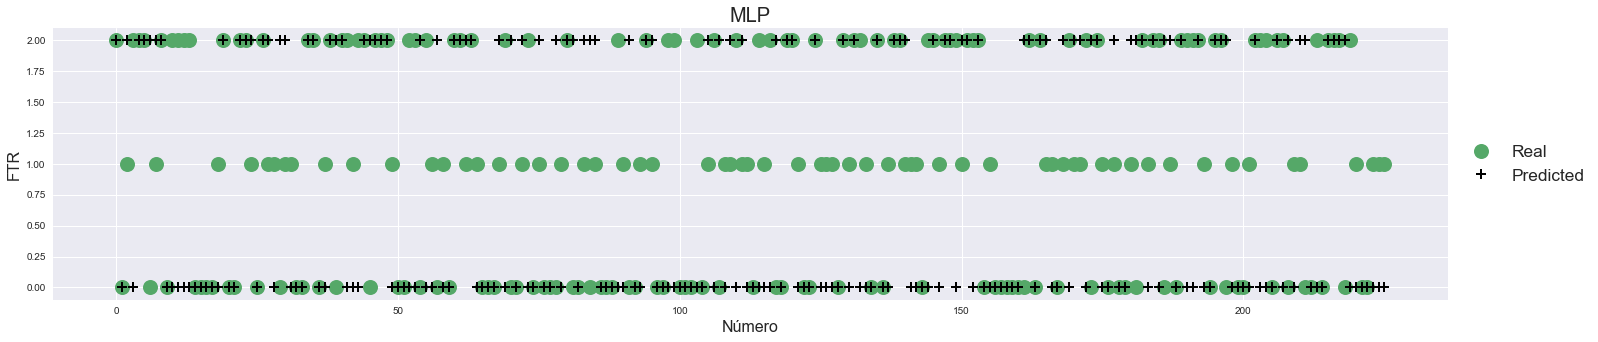

In [191]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_mlp_classifier, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('MLP',fontsize=20)
plt.show()

## Resultados finais

In [192]:
print('\nRegressão logística: %.2f' %reg_log_all + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %rand_for_all + "%")
print('\nKNN: %.2f' %knn_all + "%")
print('\nMLP: %.2f' %mlp_all + "%")


Regressão logística: 45.13%

Árvore de decisão: 28.32%

Floresta aleatória: 35.84%

KNN: 40.71%

MLP: 48.23%


In [193]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_all + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_all + "%")
print('\nKNN: %.2f' %cross_knn_all + "%")
print('\nSVM: %.2f' %svm_all + "%")
print('\nMLP: %.2f' %cross_mlp_all + "%")

Cross Validation

Regressão logística: 58.67%

Árvore de decisão: 57.33%

Floresta aleatória: 53.33%

KNN: 49.33%

SVM: 51.33%

MLP: 58.67%


## Outra abordagem

### Vitória x Derrota

In [194]:
# 2 - Vitória, 0 - Derrota, 1 - Empate
df_cxf = df[df['FTR'] != 1]
df_cxf.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,...,receivedFouls,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
0,2.0,-0.168140,0.410117,1.022060,-1.159548,-1.681327,-0.396135,0.727197,1.028067,-0.139832,...,0.535935,-1.251674,1.460464,0.751466,0.0,-0.718523,-0.888714,-0.92024,0.380777,-0.387335
1,0.0,0.743071,-0.528759,-0.555906,0.131668,-0.242636,-0.396135,0.064435,-1.829355,0.368405,...,-1.251566,0.535231,0.180088,1.042655,0.0,-0.177484,-0.888714,-0.30403,-0.541305,-0.194178
2,2.0,-0.623745,-0.340984,-1.081895,0.014285,-0.961982,-0.396135,-0.598326,0.576895,-0.139832,...,-0.655732,-1.450219,-0.246704,0.460278,0.0,-0.718523,-0.132957,-0.92024,-0.347182,-0.773648
3,0.0,1.198676,1.004738,0.496071,-0.103099,-0.242636,-0.396135,0.064435,0.125723,-0.648070,...,-1.450177,-0.656039,-0.246704,1.042655,0.0,1.445633,-0.888714,-0.30403,1.011675,1.351073
6,0.0,-0.168140,0.926498,1.548049,0.131668,-0.242636,-0.396135,-0.266946,0.125723,0.368405,...,2.124825,0.733776,-1.100288,0.460278,0.0,-0.718523,-0.132957,-0.30403,1.044029,-0.001022


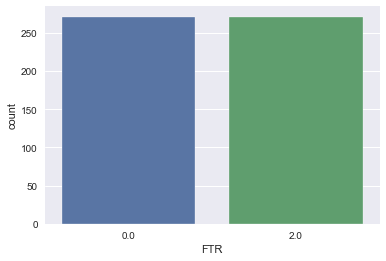

In [195]:
sns.countplot(x='FTR', data=df_cxf)

In [196]:
# Características
X = df_cxf.drop('FTR',axis=1)
# Alvo da previsão
y = df_cxf['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_cxf = logistic_regression.score(X_test, y_test) * 100
cross_log_cxf = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_cxf = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_cxf = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_cxf = random_forest.score(X_test, y_test) * 100
cross_rand_for_cxf = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_cxf = knn.score(X_test, y_test) * 100
cross_knn_cxf = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid.fit(X, y)
predict_svm = grid.predict(X_test)
svm_cxf = grid.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_cxf = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_cxf = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [197]:
print('\nRegressão logística: %.2f' %reg_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxf + "%")
print('\nKNN: %.2f' %knn_cxf + "%")
print('\nMLP: %.2f' %mlp_cxf + "%")


Regressão logística: 68.10%

Árvore de decisão: 65.03%

Floresta aleatória: 73.01%

KNN: 61.96%

MLP: 49.08%


In [198]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxf + "%")
print('\nKNN: %.2f' %cross_knn_cxf + "%")
print('\nSVM: %.2f' %svm_cxf + "%")
print('\nMLP: %.2f' %cross_mlp_cxf + "%")

Cross Validation

Regressão logística: 83.33%

Árvore de decisão: 66.67%

Floresta aleatória: 77.78%

KNN: 75.93%

SVM: 71.78%

MLP: 72.22%


### Vitória x Empate

In [199]:
# 2 - Casa, 0 - Fora, 1 - Empate
df_cxe = df[df['FTR'] != 0]
df_cxe.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,...,receivedFouls,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
0,2.0,-0.168140,0.410117,1.022060,-1.159548,-1.681327,-0.396135,0.727197,1.028067,-0.139832,...,0.535935,-1.251674,1.460464,0.751466,0.0,-0.718523,-0.888714,-0.920240,0.380777,-0.387335
2,2.0,-0.623745,-0.340984,-1.081895,0.014285,-0.961982,-0.396135,-0.598326,0.576895,-0.139832,...,-0.655732,-1.450219,-0.246704,0.460278,0.0,-0.718523,-0.132957,-0.920240,-0.347182,-0.773648
4,1.0,-1.534956,1.082978,-0.555906,1.422884,-0.961982,-0.396135,0.727197,-0.927011,0.876642,...,0.138713,0.535231,2.740839,0.751466,0.0,-1.259561,-0.888714,0.312181,1.108736,0.288713
5,1.0,2.109887,0.629188,-1.607884,1.540267,0.476709,-0.396135,0.395816,0.576895,3.417828,...,0.535935,0.138141,0.606880,1.333843,0.0,-0.177484,2.890071,1.544601,0.558723,0.481869
7,2.0,-0.168140,-1.311156,-1.081895,-0.807398,-0.242636,-0.396135,-1.261088,-0.927011,-0.648070,...,0.734546,2.123591,0.180088,-0.995664,0.0,-0.718523,-0.132957,-0.304030,-1.253087,0.578447


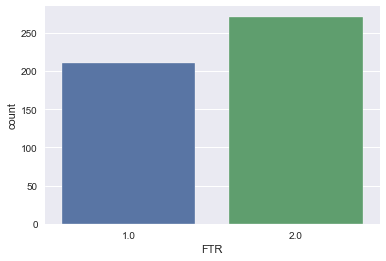

In [200]:
sns.countplot(x='FTR', data=df_cxe)

In [201]:
# Características
X = df_cxe.drop('FTR',axis=1)
# Alvo da previsão
y = df_cxe['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_cxe = logistic_regression.score(X_test, y_test) * 100
cross_log_cxe = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_cxe = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_cxe = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_cxe = random_forest.score(X_test, y_test) * 100
cross_rand_for_cxe = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_cxe = knn.score(X_test, y_test) * 100
cross_knn_cxe = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid.fit(X, y)
predict_svm = grid.predict(X_test)
svm_cxe = grid.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_cxe = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_cxe = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [202]:
print('\nRegressão logística: %.2f' %reg_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxe + "%")
print('\nKNN: %.2f' %knn_cxe + "%")
print('\nMLP: %.2f' %mlp_cxe + "%")


Regressão logística: 56.55%

Árvore de decisão: 51.03%

Floresta aleatória: 50.34%

KNN: 63.45%

MLP: 53.79%


In [203]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxe + "%")
print('\nKNN: %.2f' %cross_knn_cxe + "%")
print('\nSVM: %.2f' %svm_cxe + "%")
print('\nMLP: %.2f' %cross_mlp_cxe + "%")

Cross Validation

Regressão logística: 66.67%

Árvore de decisão: 66.67%

Floresta aleatória: 66.67%

KNN: 68.75%

SVM: 64.14%

MLP: 57.14%


### Derrota x Empate

In [204]:
# 2 - Casa, 0 - Fora, 1 - Empate
df_fxe = df[df['FTR'] != 2]
df_fxe.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,defenses,...,receivedFouls,committedFouls,goodFinishes,badFinishes,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
1,0.0,0.743071,-0.528759,-0.555906,0.131668,-0.242636,-0.396135,0.064435,-1.829355,0.368405,...,-1.251566,0.535231,0.180088,1.042655,0.0,-0.177484,-0.888714,-0.304030,-0.541305,-0.194178
3,0.0,1.198676,1.004738,0.496071,-0.103099,-0.242636,-0.396135,0.064435,0.125723,-0.648070,...,-1.450177,-0.656039,-0.246704,1.042655,0.0,1.445633,-0.888714,-0.304030,1.011675,1.351073
4,1.0,-1.534956,1.082978,-0.555906,1.422884,-0.961982,-0.396135,0.727197,-0.927011,0.876642,...,0.138713,0.535231,2.740839,0.751466,0.0,-1.259561,-0.888714,0.312181,1.108736,0.288713
5,1.0,2.109887,0.629188,-1.607884,1.540267,0.476709,-0.396135,0.395816,0.576895,3.417828,...,0.535935,0.138141,0.606880,1.333843,0.0,-0.177484,2.890071,1.544601,0.558723,0.481869
6,0.0,-0.168140,0.926498,1.548049,0.131668,-0.242636,-0.396135,-0.266946,0.125723,0.368405,...,2.124825,0.733776,-1.100288,0.460278,0.0,-0.718523,-0.132957,-0.304030,1.044029,-0.001022


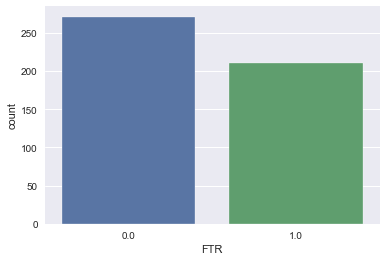

In [205]:
sns.countplot(x='FTR', data=df_fxe)

In [206]:
# Características
X = df_fxe.drop('FTR',axis=1)
# Alvo da previsão
y = df_fxe['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_fxe = logistic_regression.score(X_test, y_test) * 100
cross_log_fxe = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_fxe = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_fxe = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_fxe = random_forest.score(X_test, y_test) * 100
cross_rand_for_fxe = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_fxe = knn.score(X_test, y_test) * 100
cross_knn_fxe = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid.fit(X, y)
predict_svm = grid.predict(X_test)
svm_fxe = grid.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_fxe = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_fxe = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [207]:
print('\nRegressão logística: %.2f' %reg_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_fxe + "%")
print('\nKNN: %.2f' %knn_fxe + "%")
print('\nMLP: %.2f' %mlp_fxe + "%")


Regressão logística: 46.21%

Árvore de decisão: 55.17%

Floresta aleatória: 42.76%

KNN: 51.03%

MLP: 53.79%


In [208]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_fxe + "%")
print('\nKNN: %.2f' %cross_knn_fxe + "%")
print('\nSVM: %.2f' %svm_fxe + "%")
print('\nMLP: %.2f' %cross_mlp_fxe + "%")

Cross Validation

Regressão logística: 60.42%

Árvore de decisão: 68.75%

Floresta aleatória: 59.18%

KNN: 56.25%

SVM: 53.79%

MLP: 57.14%


## Resultados

In [209]:
print("Vitória x Derrota x Empate")
print('\nRegressão logística: %.2f' %reg_log_all + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %rand_for_all + "%")
print('\nKNN: %.2f' %knn_all + "%")
print('\nMLP: %.2f' %mlp_all + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_all + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_all + "%")
print('\nKNN: %.2f' %cross_knn_all + "%")
print('\nSVM: %.2f' %svm_all + "%")
print('\nMLP: %.2f' %cross_mlp_all + "%")

print("\n\nVitória x Derrota")
print('\nRegressão logística: %.2f' %reg_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxf + "%")
print('\nKNN: %.2f' %knn_cxf + "%")
print('\nMLP: %.2f' %mlp_cxf + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxf + "%")
print('\nKNN: %.2f' %cross_knn_cxf + "%")
print('\nSVM: %.2f' %svm_cxf + "%")
print('\nMLP: %.2f' %cross_mlp_cxf + "%")

print("\n\nVitória x Empate")
print('\nRegressão logística: %.2f' %reg_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxe + "%")
print('\nKNN: %.2f' %knn_cxe + "%")
print('\nMLP: %.2f' %mlp_cxe + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxe + "%")
print('\nKNN: %.2f' %cross_knn_cxe + "%")
print('\nSVM: %.2f' %svm_cxe + "%")
print('\nMLP: %.2f' %cross_mlp_cxe + "%")

print("\n\nDerrota x Empate")
print('\nRegressão logística: %.2f' %reg_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_fxe + "%")
print('\nKNN: %.2f' %knn_fxe + "%")
print('\nMLP: %.2f' %mlp_fxe + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_fxe + "%")
print('\nKNN: %.2f' %cross_knn_fxe + "%")
print('\nSVM: %.2f' %svm_fxe + "%")
print('\nMLP: %.2f' %cross_mlp_fxe + "%")

Vitória x Derrota x Empate

Regressão logística: 45.13%

Árvore de decisão: 28.32%

Floresta aleatória: 35.84%

KNN: 40.71%

MLP: 48.23%

Cross Validation

Regressão logística: 58.67%

Árvore de decisão: 57.33%

Floresta aleatória: 53.33%

KNN: 49.33%

SVM: 51.33%

MLP: 58.67%


Vitória x Derrota

Regressão logística: 68.10%

Árvore de decisão: 65.03%

Floresta aleatória: 73.01%

KNN: 61.96%

MLP: 49.08%

Cross Validation

Regressão logística: 83.33%

Árvore de decisão: 66.67%

Floresta aleatória: 77.78%

KNN: 75.93%

SVM: 71.78%

MLP: 72.22%


Vitória x Empate

Regressão logística: 56.55%

Árvore de decisão: 51.03%

Floresta aleatória: 50.34%

KNN: 63.45%

MLP: 53.79%

Cross Validation

Regressão logística: 66.67%

Árvore de decisão: 66.67%

Floresta aleatória: 66.67%

KNN: 68.75%

SVM: 64.14%

MLP: 57.14%


Derrota x Empate

Regressão logística: 46.21%

Árvore de decisão: 55.17%

Floresta aleatória: 42.76%

KNN: 51.03%

MLP: 53.79%

Cross Validation

Regressão logística: 60.42%

Árvo

In [210]:
sns.set(font_scale=1.1)

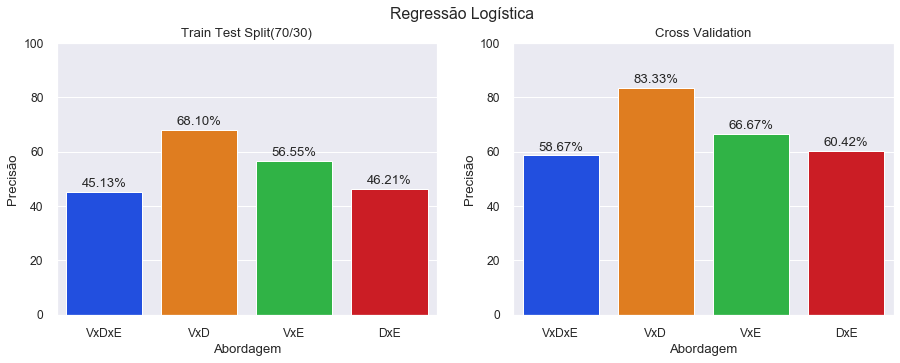

In [211]:
# Regressões Logística
plt.figure(figsize=(15,5))
plt.suptitle('Regressão Logística')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[reg_log_all,reg_log_cxf,reg_log_cxe,reg_log_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[cross_log_all,cross_log_cxf,cross_log_cxe,cross_log_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/regressao_logistica_br.png')

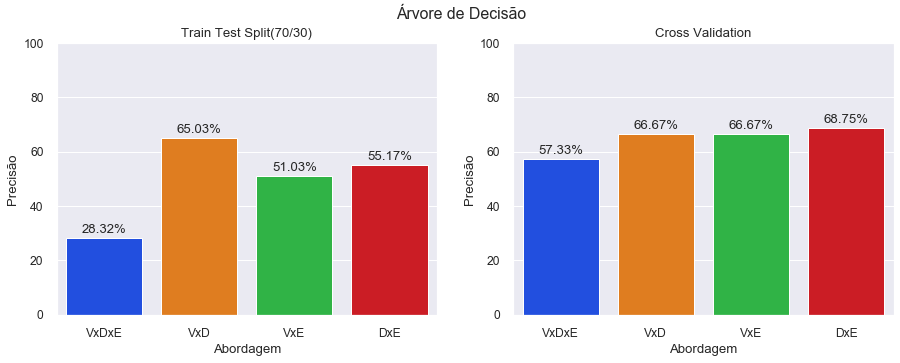

In [212]:
# Árvore de Decisão
plt.figure(figsize=(15,5))
plt.suptitle('Árvore de Decisão')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[dec_tree_all,dec_tree_cxf,dec_tree_cxe,dec_tree_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[cross_dec_tree_all,cross_dec_tree_cxf,cross_dec_tree_cxe,cross_dec_tree_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/arvore_decisao_br.png')

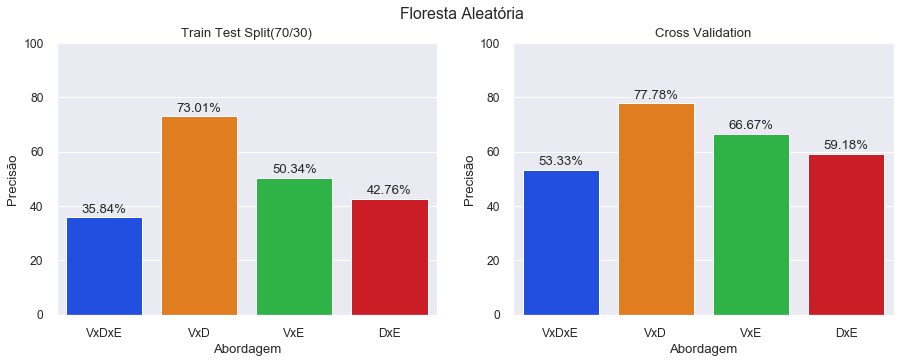

In [213]:
# Floresta Aleatória
plt.figure(figsize=(15,5))
plt.suptitle('Floresta Aleatória')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[rand_for_all,rand_for_cxf,rand_for_cxe,rand_for_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[cross_rand_for_all,cross_rand_for_cxf,cross_rand_for_cxe,cross_rand_for_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/floresta_aleatoria_br.png')

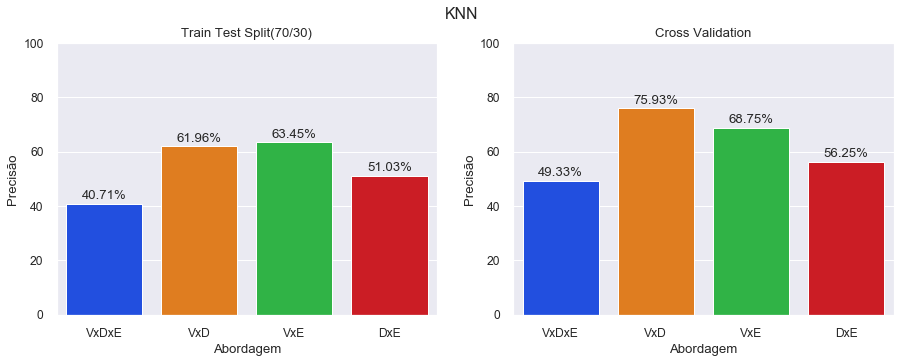

In [214]:
# KNN
plt.figure(figsize=(15,5))
plt.suptitle('KNN')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[knn_all,knn_cxf,knn_cxe,knn_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[cross_knn_all,cross_knn_cxf,cross_knn_cxe,cross_knn_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/knn_br.png')

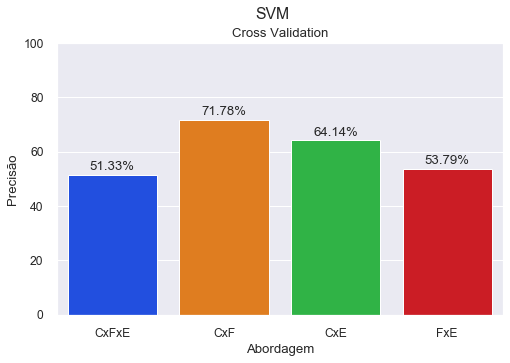

In [215]:
# SVM
plt.figure(figsize=(8,5))
plt.suptitle('SVM')

plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[svm_all,svm_cxf,svm_cxe,svm_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/svm_br.png')

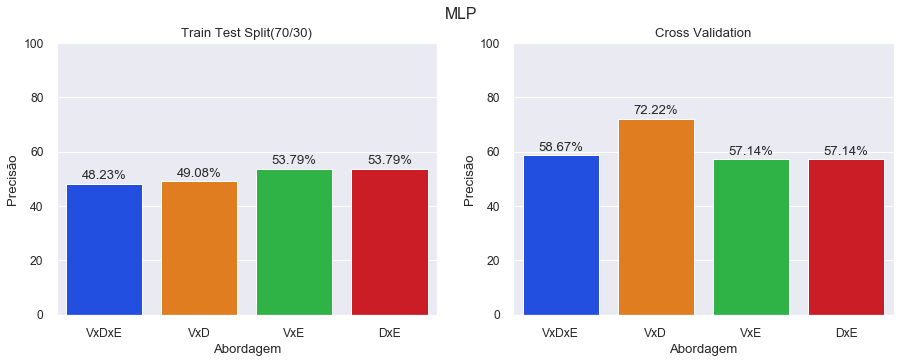

In [216]:
# MLP
plt.figure(figsize=(15,5))
plt.suptitle('MLP')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[mlp_all,mlp_cxf,mlp_cxe,mlp_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxDxE','VxD','VxE','DxE'], y=[cross_mlp_all,cross_mlp_cxf,cross_mlp_cxe,cross_mlp_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/mlp_br.png')

#### Considerações

Os algoritmos performam melhor com modelos binários.  
É mais fácil classificar casa e fora, podemos perceber que os testes feitos com empate tem menor resultado.